In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from time import time
from plot import StreamPlot
from eddies_detection import  get_traj_with_parcels, get_traj_with_scipy, get_traj_with_numpy, find_eddies

date = 0
stream_data_fname = "../data/data.nc"
runtime = 400
delta_time = 5
particle_grid_step = 4

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

## Compute trajectories using parcels lib

In [7]:
help(get_traj_with_parcels)

Help on function get_traj_with_parcels in module eddies_detection:

get_traj_with_parcels(date, runtime, delta_time, particle_grid_step, stream_data_fname)
    Compute trajectories of particles in the sea using parcels library.
    
    Compute trajectories of particles in the sea at a given date, in a static 2D
    field of stream using Runge Kutta 4th order algorithm.
    
    Args:
        date (int) : Day in number of days relatively to the data time origin at
            which the stream data should be taken.
        runtime (int) : Total duration in hours of the field integration.
            Trajectories length increases with the runtime.
        delta_time (int) : Time step in hours of the integration.
        particle_grid_step (int) : Grid step size for the initial positions of
            the particles. The unit is the data index step, ie data dx and dy.
        stream_data_fname (str) : Complete name of the stream data file.
    
    Returns:
        stream_line_list (list 

In [ ]:
figure = StreamPlot()
t0 = time()
a = get_traj_with_parcels(date, runtime, delta_time, particle_grid_step, stream_data_fname)
print(time()-t0)
figure.plot_trajectories(a,line_style='k')
figure.show()

## Compute trajectories using scipy lib

Integration: 100%|██████████| 2390/2390 [01:16<00:00, 31.44it/s]


76.0536618232727


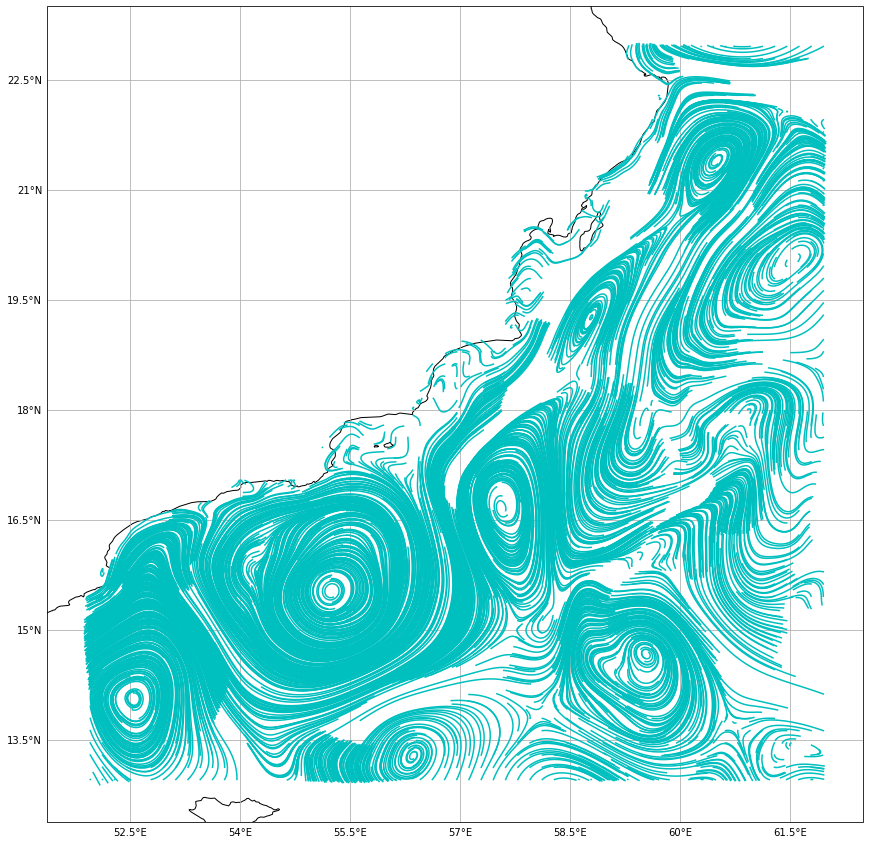

In [5]:
figure = StreamPlot()
t0 = time()
b = get_traj_with_scipy(date, runtime, delta_time, particle_grid_step, stream_data_fname)
print(time()-t0)
figure.plot_trajectories(b,line_style='c')
figure.show()

## Compute trajectories using numpy only

Integration: 100%|██████████| 80/80 [00:06<00:00, 11.72it/s]



8.91079068183899


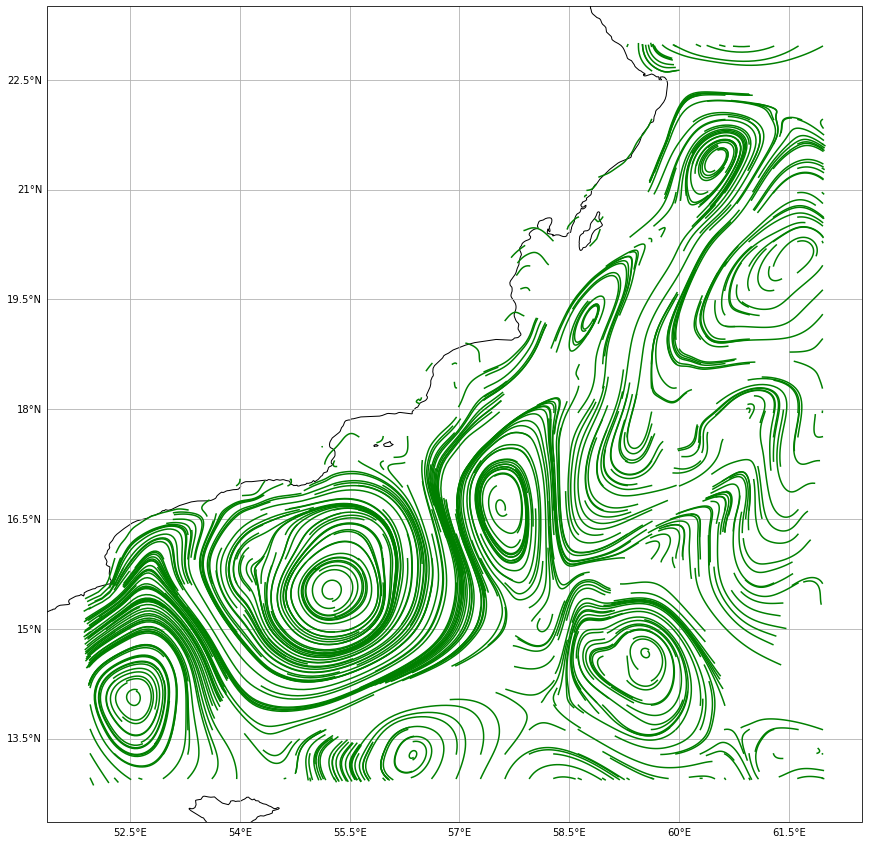

In [3]:
figure = StreamPlot()
t0 = time()
c = get_traj_with_numpy(date, runtime, delta_time, particle_grid_step, stream_data_fname)
print(time()-t0)
figure.plot_trajectories(c,line_style='g')
figure.show()

## Find eddies and display

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]

import random as rd
rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

figure = StreamPlot()
aa = find_eddies(a)
for eddy in aa:
    line_style = rd_color()
    figure.plot_trajectories(eddy.sl_list,line_style=line_style)
figure.show()

figure = StreamPlot()
bb = find_eddies(b)
for eddy in bb:
    line_style = rd_color()
    figure.plot_trajectories(eddy.sl_list,line_style=line_style)
figure.show()

figure = StreamPlot()
cc = find_eddies(c)
for eddy in cc:
    line_style = rd_color()
    figure.plot_trajectories(eddy.sl_list,line_style=line_style)
figure.show()

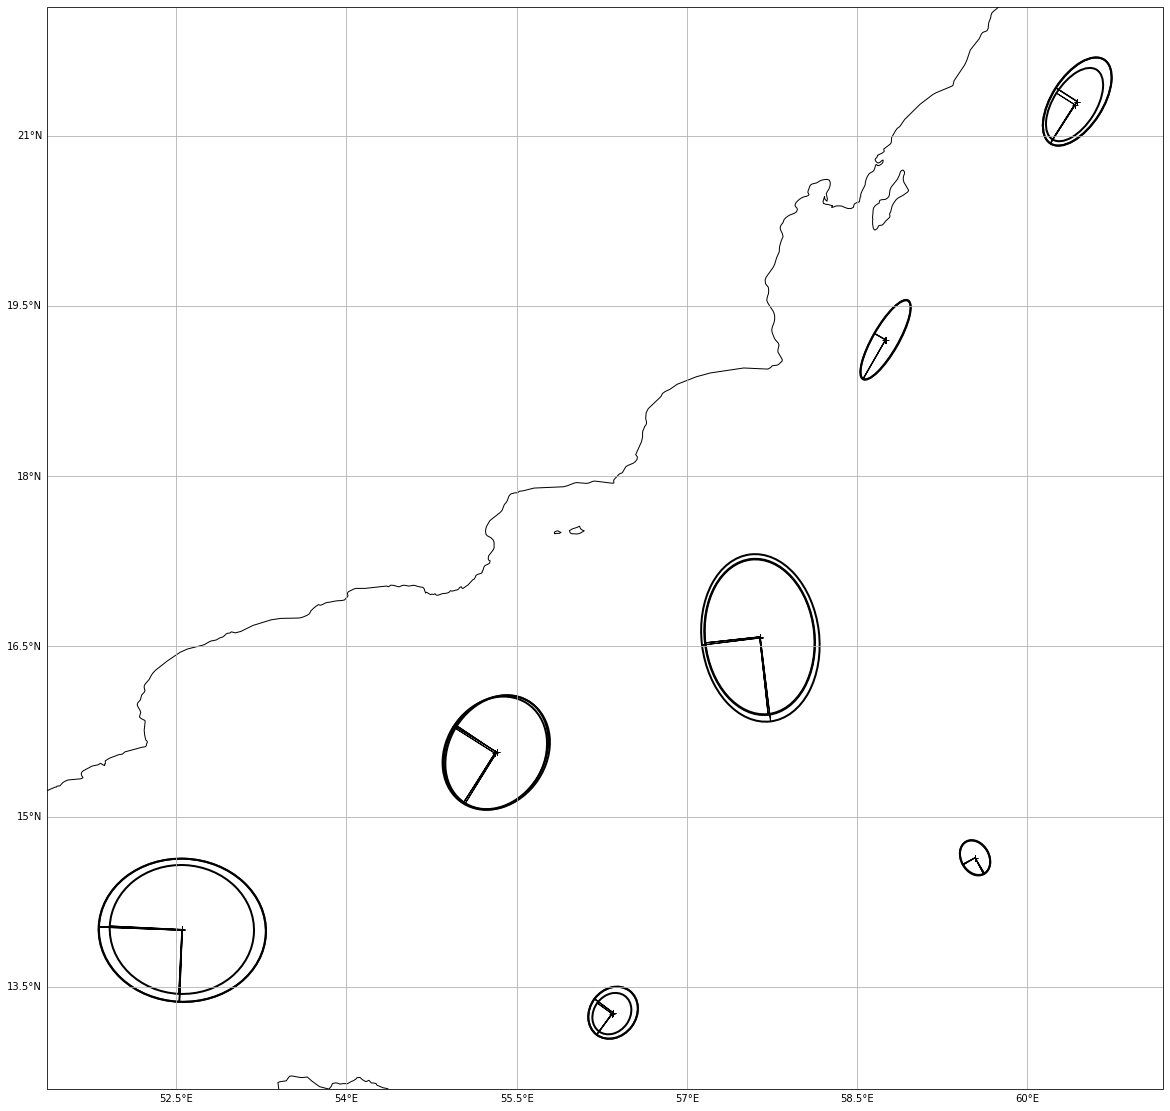

In [14]:
figure = StreamPlot()
figure.plot_eddies(aa,plot_traj=False)
figure.plot_eddies(bb,plot_traj=False)
figure.plot_eddies(cc,plot_traj=False)
figure.show()

In [9]:
import os
os.system("find . -regextype posix-extended -regex './out-[A-Z]{8}' -exec rm -r {} +")

0

## Find eddies and display using Numpy

L1 :  112.47223627320666
optimizing:  True
L1 :  42.75248605888426
optimizing:  False
L1 :  88.34197388605266
optimizing:  True
L1 :  7.912959095515619
optimizing:  False


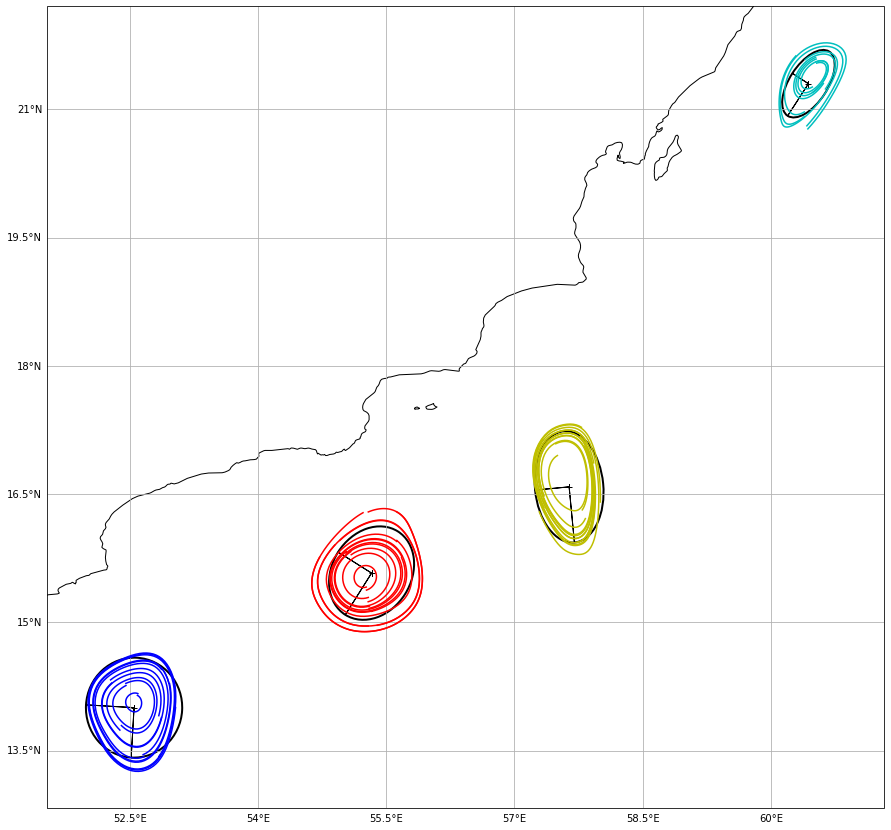

In [5]:
import random as rd
rd_color = lambda: rd.choice(['b','g','r','c','m','y'])

figure = StreamPlot()
cc = find_eddies(c,date)
for eddy in cc:
    line_style = rd_color()
    figure.plot_eddies(eddy,plot_traj=True,line_style=line_style+"-")
figure.show()